<a href="https://colab.research.google.com/github/Chandan801/Dr.Proton/blob/master/Student%20marks%20predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files
uploaded=files.upload()

Saving student_info.csv to student_info.csv


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import io

In [8]:
df=pd.read_csv(io.StringIO(uploaded['student_info.csv'].decode('utf-8')))

In [9]:
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


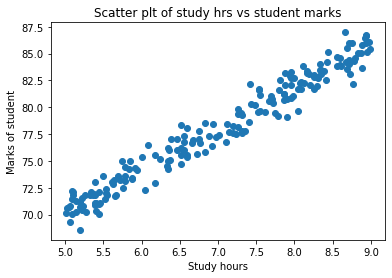

In [16]:
plt.scatter(x=df.study_hours,y=df.student_marks)
plt.xlabel("Study hours")
plt.ylabel("Marks of student")
plt.title("Scatter plt of study hrs vs student marks")
plt.show()#we can clearly see that if study hrs increases,marks of the student will increase.

## Preparing data for Machine learning algo 

### 1)Ceaning the data

In [18]:
df_clean=df.fillna(df.mean())
df_clean.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [25]:
#X=df_clean['study_hours']
#y=df_clean['student_marks']
#print(y.shape)

(200,)


In [27]:
X=df_clean.drop('student_marks',axis='columns')
y=df_clean.drop('study_hours',axis='columns')
print(y.shape)

(200, 1)


In [28]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=51)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 1)
(160, 1)
(40, 1)
(40, 1)


As we saw earlier that our data is in linear format, so we're going to use linear regression algo to build a ML model. y=m.x+c

In [31]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [32]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
y_pred=lr.predict(X_test)

In [36]:
pd.DataFrame(np.c_[X_test,y_test,y_pred],columns=["study_hours","student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


In [37]:
lr.score(X_test,y_test)

0.9514124242154466

# Save ML model

In [38]:
import joblib
joblib.dump(lr,"Student_marks_predictor.pkl")

['Student_marks_predictor.pkl']

In [39]:
model=joblib.load("Student_marks_predictor.pkl")

In [42]:
model.predict([[6]])[0][0]

74.06166313683238